### Trabajo realizado por Pablo Torre e Ignacio Jiménez

## Datos

In [1]:
# read csv
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_good = pd.read_csv('dataset_practica/2000_goodware_2018_2020_features.csv')
df_good['label'] = 0
df_bad = pd.read_csv('dataset_practica/2000_malware_2018_2020_features.csv')
df_bad['label'] = 1
df = pd.concat([df_good, df_bad])
df

,hash,PackageName,min_andrversion,max_andrversion,target_andrversion,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,...,TextViewCount,EditViewCount,ImageButtonCount,CheckBoxCount,RadioGroupCount,RadioButtonCount,ToastCount,SpinnerCount,ListViewCount,label
0,000c6c8ef16e3793674bf1bf2cb0cfdb,com.gf.client,17,0,27,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8e46f1e9830d46402495c0450c489673,com.blueframetech.apexsports,21,0,28,0,0,0,0,0,...,66,3,3,2,2,3,0,40,54,0
2,b28937c14945eef354bbb893f3a97c74,com.devgame66.sniperking,17,0,28,0,0,0,0,0,...,50,3,3,2,0,3,0,37,27,0
3,07c7bc0ea194ff996c4c653b6a10432a,com.auroracoopapp,26,0,29,0,0,0,0,0,...,64,11,14,19,1,16,0,48,54,0
4,334f46c3aeb57318f7a91194cc03f407,com.artha1wides.pkbm_c_new,14,0,28,0,0,0,0,0,...,50,3,3,3,0,3,1,46,43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,647b521e30acd21b152b88df9934176b,sogou.mobile.explorer,16,0,26,0,0,0,0,0,...,128,67,67,1,0,1,45,29,336,1
1996,5131dad4772798b26987605bff9f3daa,com.jiasoft.swreader,14,0,28,0,0,0,0,0,...,673,4,6,2,0,3,0,37,55,1
1997,37461dd12419c0a78b6ba1902e6b582e,com.jys,16,0,22,0,0,0,0,0,...,37,26,3,2,0,2,7,35,11,1
1998,1895994f3b7ad509a72e60ed97fb9942,com.starbaba.starbaba,19,0,27,0,0,0,0,0,...,121,27,11,27,5,3,7,48,104,1


In [2]:
## remove unnecessary columns
df.drop(['hash', 'PackageName'], axis=1, inplace=True)

In [3]:
## split data into train and validation
from sklearn.model_selection import train_test_split

train, eval = train_test_split(df, test_size=0.1, random_state=42, stratify=df['label'])
### count the number of malware and goodware in train and validation
print(train['label'].value_counts())
print(eval['label'].value_counts())

1    1800
0    1800
Name: label, dtype: int64
0    200
1    200
Name: label, dtype: int64


## Decision Tree

In [11]:
### train a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state=42)
clf.fit(train.drop('label', axis=1), train['label'])
pred = clf.predict(eval.drop('label', axis=1))
accuracy_score(eval['label'], pred)

0.975

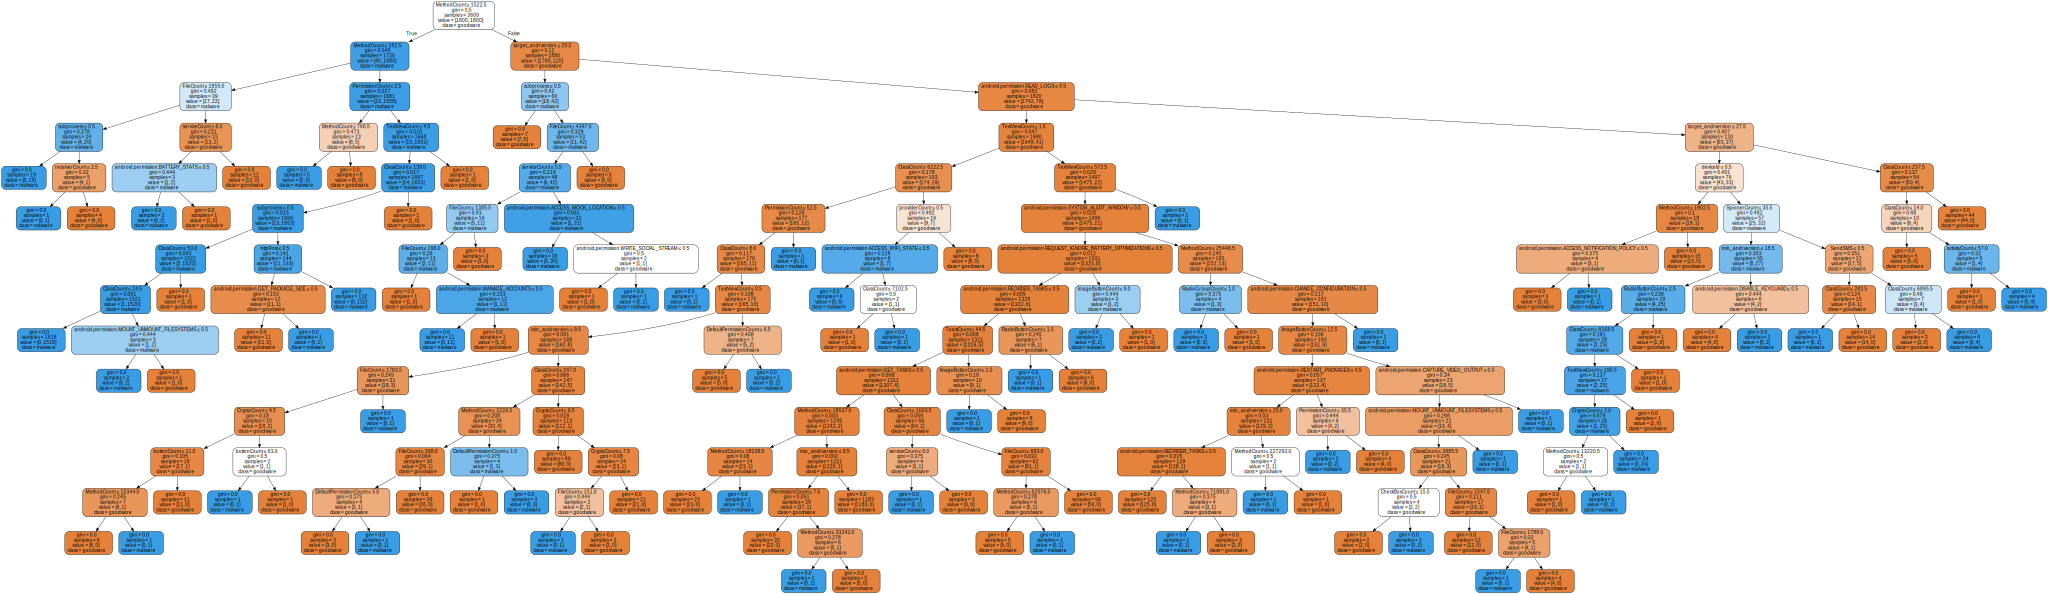

In [12]:
### extract the characteristics of the decision tree
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file=None, feature_names=train.drop('label', axis=1).columns, class_names=['goodware', 'malware'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('malware')
graph


## XGBOOST

Accuracy: 0.9824999999999999 +- 0.00844097150806707


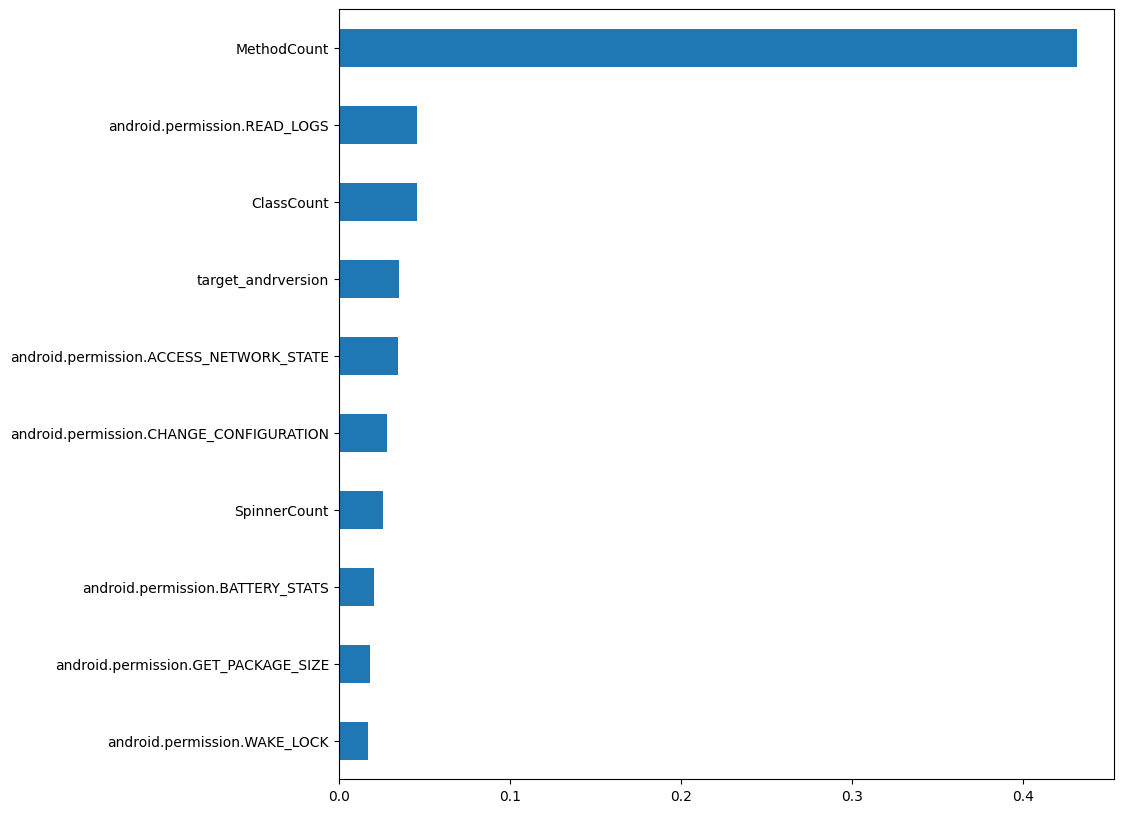

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       200
           1       1.00      0.98      0.99       200

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



<AxesSubplot: >

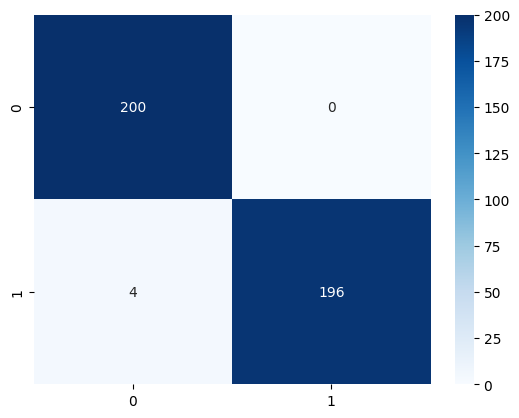

In [6]:
### train an xgboost with cross-validation
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

clf = XGBClassifier(random_state=42)


## cross-validation (with 10 folds and all the data)
cv = 10
pred = cross_val_score(clf, df.drop('label', axis=1), df['label'], cv=cv)
print('Accuracy:', pred.mean(), '+-', pred.std())

### train the final model using only the training data
clf.fit(train.drop('label', axis=1), train['label'])
pred = clf.predict(eval.drop('label', axis=1))
accuracy_score(eval['label'], pred)

### plot the top ten most important characteristics
plt.figure(figsize=(10, 10))
## select the top ten most important characteristics
feat_importances = pd.Series(clf.feature_importances_, index=train.drop('label', axis=1).columns)
feat_importances = feat_importances.nlargest(10)
feat_importances.plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

### show the classification report
print(classification_report(eval['label'], pred))

### show matrix of confusion
sns.heatmap(confusion_matrix(eval['label'], pred), annot=True, fmt='d', cmap='Blues')


### To test with other data

In [ ]:
#### LOAD NEW DATA

# test = pd.read_csv('x')


# pred = clf.predict(test.drop('label', axis=1))
# accuracy_score(test['label'], pred)

## Attacks

### Manual Attack - Evasión

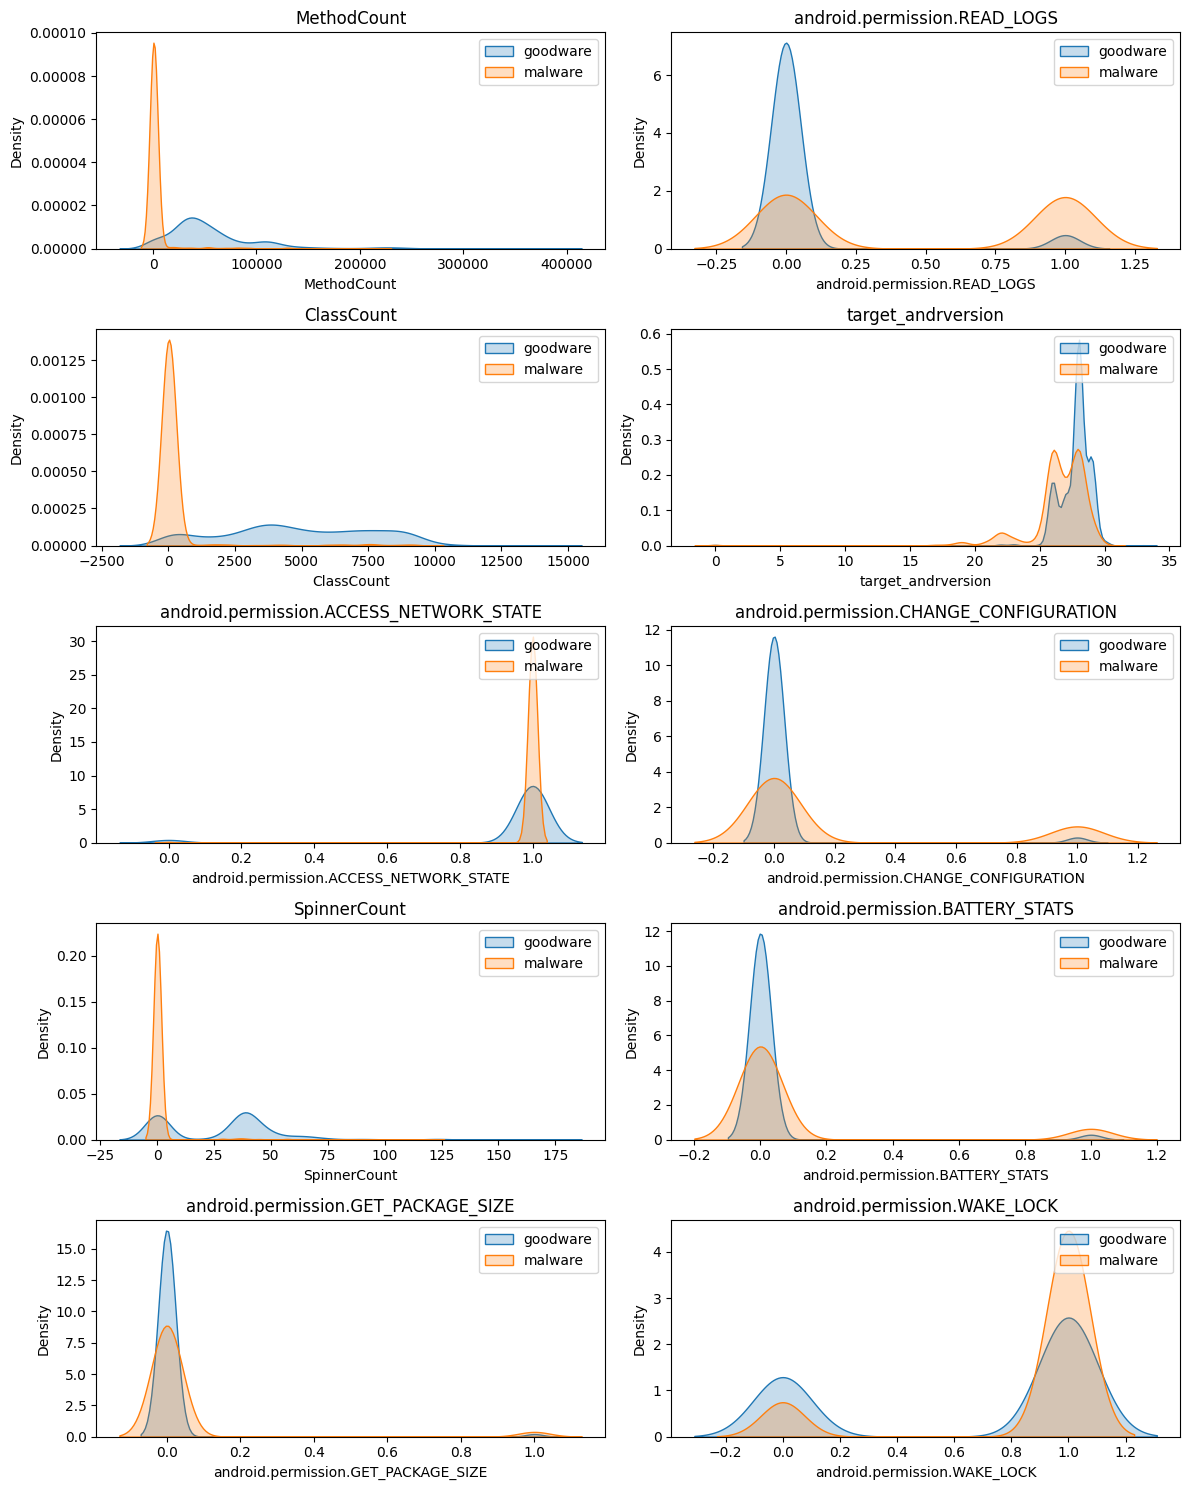

In [7]:
### plot distribution of the most important characteristics for goodware and malware
plt.figure(figsize=(12, 15))
for i, col in enumerate(feat_importances.index):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(df[df['label']==0][col], label='goodware', shade=True)
    sns.kdeplot(df[df['label']==1][col], label='malware', shade=True)
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()

In [8]:
### select an example of malware and predict
example = df[df['label'] == 1].iloc[0]

## show the characteristics of the example
print(example[feat_importances.nlargest(10).index])

## predict
print(clf.predict([example.drop('label')]))
print(clf.predict_proba([example.drop('label')]))

MethodCount                                665
android.permission.READ_LOGS                 0
ClassCount                                  12
target_andrversion                          28
android.permission.ACCESS_NETWORK_STATE      1
android.permission.CHANGE_CONFIGURATION      0
SpinnerCount                                 0
android.permission.BATTERY_STATS             0
android.permission.GET_PACKAGE_SIZE          0
android.permission.WAKE_LOCK                 0
Name: 0, dtype: int64
[1]
[[6.9606304e-04 9.9930394e-01]]


In [9]:
## Primer intento -> MethodCount

### modify the example to make it look like goodware
example_modified = example.copy()
example_modified['MethodCount'] += 5000

## predict
print(clf.predict([example_modified.drop('label')]))
print(clf.predict_proba([example_modified.drop('label')]))

[1]
[[0.210127 0.789873]]


In [10]:
## Segundo intento -> ClassCount -> Conseguido!!


### modify the example to make it look like goodware
example_modified = example.copy()
#example_modified['MethodCount'] += 10000
example_modified['ClassCount'] = 73
#example_modified['SpinnerCount'] = 30

## predict
print(clf.predict([example_modified.drop('label')]))
print(clf.predict_proba([example_modified.drop('label')]))

[0]
[[0.6346581  0.36534193]]
